In [1]:
!pip install transformers

In [2]:
!pip install vaderSentiment

In [4]:
from transformers import pipeline
from scipy.stats import ttest_rel, ttest_ind
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
sentiment_analysis = pipeline("sentiment-analysis")
analyzer = SentimentIntensityAnalyzer()

# Get the sentiment for a list of captions
def pipeline_sentiments(captions):
    return np.array([sentiment_analysis(caption)[0]['label'] for caption in captions])

def vader_sentiments(captions):
    return np.array([analyzer.polarity_scores(caption)['compound'] for caption in captions])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
# captions = pd.read_csv("C:/Users/ewang/OneDrive/Desktop/Spring_2024/COS_429/Final/captions_GIT_20_percent.csv")
captions = pd.read_csv("C:/Users/ewang/OneDrive/Desktop/Spring_2024/COS_429/Final/captions_BLIP_cos_20_percent.csv")

light_captions = captions["light_caption"]
dark_captions = captions["dark_caption"]
# t_stat, p_value = ttest_rel(sentiments_light, sentiments_dark)

In [14]:
pipeline_light = pipeline_sentiments(light_captions)
pipeline_dark = pipeline_sentiments(dark_captions)


In [15]:
vader_light = vader_sentiments(light_captions)
vader_dark = vader_sentiments(dark_captions)
vader_diff = vader_light - vader_dark
print(vader_diff.mean())

-0.015105479452054793


In [25]:
t_stat, p_value = ttest_rel(vader_light, vader_dark)
print("T-stat:", t_stat, "P-value: ", p_value)

print(vader_light.mean(), vader_light.std() / len(vader_light))
print(vader_dark.mean(), vader_dark.std() / len(vader_dark))

T-stat: -1.882751498832709 P-value:  0.061065850738026124
0.041982648401826486 0.0004291822185259427
0.05708812785388129 0.000492163323043682


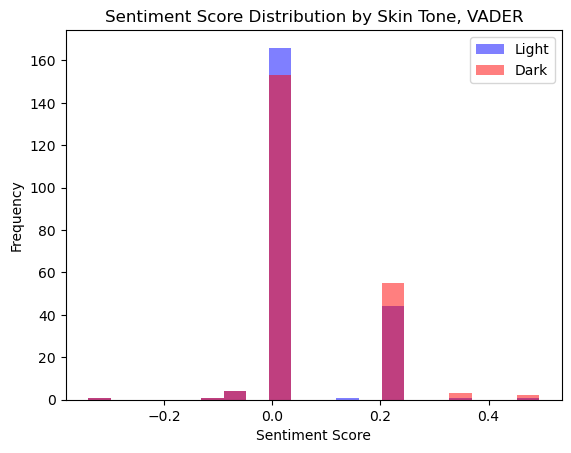

In [19]:
# Plot histograms
plt.hist(vader_light, bins=20, alpha=0.5, label='Light', color='blue')
plt.hist(vader_dark, bins=20, alpha=0.5, label='Dark', color='red')

plt.title("Sentiment Score Distribution by Skin Tone, VADER")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

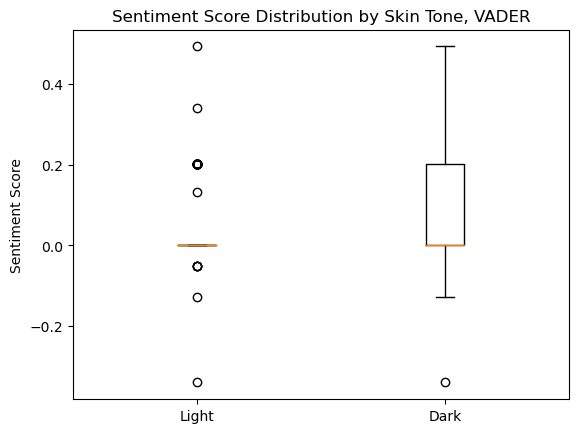

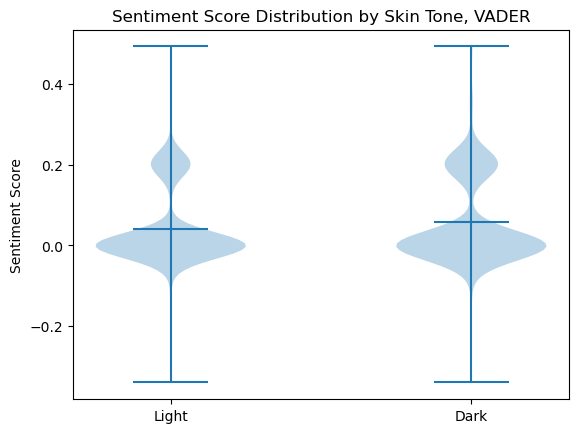

In [24]:
plt.boxplot([vader_light, vader_dark], labels=['Light', 'Dark'])
plt.title("Sentiment Score Distribution by Skin Tone, VADER")
plt.ylabel("Sentiment Score")
plt.show()

plt.violinplot([vader_light, vader_dark], positions=[1, 2], showmeans=True)
plt.xticks([1, 2], ['Light', 'Dark'])
plt.title("Sentiment Score Distribution by Skin Tone, VADER")
plt.ylabel("Sentiment Score")
plt.show()

In [20]:
# Convert the output to a pandas Series
light_series = pd.Series(pipeline_light)
dark_series = pd.Series(pipeline_dark)

# Count the frequency of each label
light_counts = light_series.value_counts()
dark_counts = dark_series.value_counts()

# Create a contingency table
contingency_table = pd.DataFrame({'Light': light_counts, 'Dark': dark_counts})
contingency_table.fillna(0, inplace=True)  # Fill NaN with 0

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-square statistic: 2.2156025179856114
P-value: 0.13662171406610918
Degrees of freedom: 1
Expected frequencies:
[[139. 139.]
 [ 80.  80.]]


In [21]:
light_counts

POSITIVE    131
NEGATIVE     88
dtype: int64

In [22]:
dark_counts

POSITIVE    147
NEGATIVE     72
dtype: int64